## Curve Fitting

## 1 vs 1

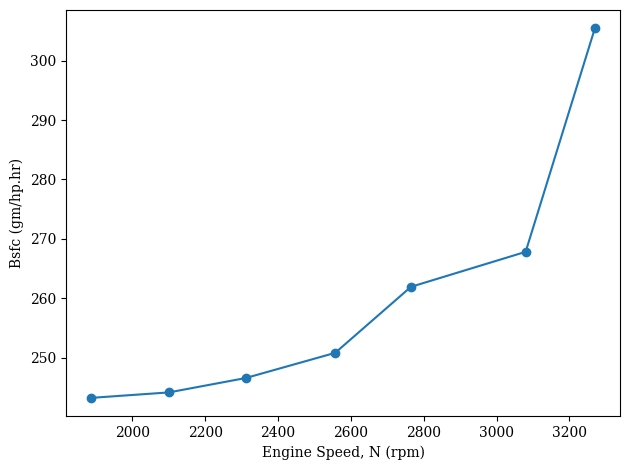

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif']

bhp = np.array([22.8839779, 24.95764273, 25.46040516, 25.89963168,
                25.5359116, 24.59668508, 23.21392265], dtype=float)
bsfc = np.array([305.4059639, 267.8106022, 261.9206271, 250.8119081,
                 246.5689846, 244.1517062, 243.2354142], dtype=float)
torque = np.array([49.85319, 57.72475, 65.5963, 72.15593, 78.71556,
                   83.4385, 87.63666], dtype=float)
speed = np.array([3270, 3080, 2765, 2557, 2311, 2100, 1887])

# Data
x = speed
y = bsfc

# Filename without extension
filename = 'bsfc_vs_speed'

# axes labels
x_label= 'Engine Speed, N (rpm)'
y_label='Bsfc (gm/hp.hr)'




# Curve fits (3rd degree polynomial)
coeffs = np.polyfit(x, y, 4)

poly_y= np.poly1d(coeffs)

# Fine x axis for smooth curves
x_fit = np.linspace(x.min(), x.max(), 200)

# Create figure and axes
fig, ax = plt.subplots()

# Plot data points
ax.scatter(x, y, color='tab:blue', marker='o')

# unfitted plot

ax.plot(x, y, color='tab:blue', linestyle='-')

# Plot fitted curves
# ax.plot(x_fit, poly_y(x_fit), color='tab:blue', linestyle='-')


# Labels
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)


# # Add Gridlines
# plt.grid(which='both', axis='both', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.savefig(f'{filename}.png', dpi=600)
plt.show()


## Many in 1

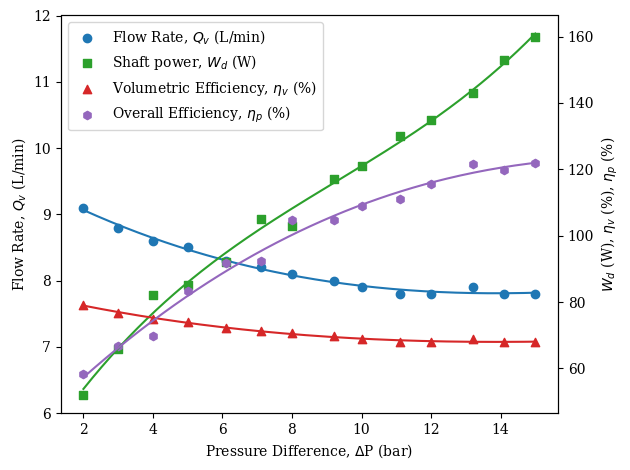

In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif']

# Data
pressure_diff = np.array([  2.0,   3.0,   4.0,   5.0,   6.1,   7.1,   8.0,   9.2,
                           10.0,  11.1,  12.0,  13.2,  14.1,  15.0], dtype=float)

flow_rate_lpm = np.array([9.1, 8.8, 8.6, 8.5, 8.3, 8.2, 8.1, 8.0, 7.9, 7.8, 7.8, 7.9,
                          7.8, 7.8], dtype=float)

shaft_power_w = np.array([ 52,  66,  82,  85,  92, 105, 103, 117, 121, 130, 135, 143, 153,
                         160], dtype=float)

volumetric_eff = np.array([79.25, 76.64, 74.89, 74.02, 72.28, 71.41, 70.54, 69.67,
                           68.80, 67.93, 67.93, 68.80, 67.93, 67.93], dtype=float)

overall_eff = np.array([ 58.33,  66.67,  69.92,  83.33,  91.72,  92.41, 104.85, 104.84,
                       108.82, 111.00, 115.56, 121.54, 119.80, 121.88], dtype=float)



# Filename without extension
filename = 'all_vs_press_diff'

# Data to x,y1,y2...
x=pressure_diff
y1=flow_rate_lpm
y2=shaft_power_w
y3=volumetric_eff
y4=overall_eff

# Plot labels also for legends
y1_label= 'Flow Rate, $Q_v$ (L/min)'
y2_label= 'Shaft power, $W_d$ (W)'
y3_label= 'Volumetric Efficiency, $\\eta_{v}$ (%)'
y4_label= 'Overall Efficiency, $\\eta_{p}$ (%)'

# axes labels
x_label= 'Pressure Difference, $\\Delta$P (bar)'
y_label='$W_d$ (W), $\\eta_{v}$ (%), $\\eta_{p}$ (%)'


# Curve fits (3rd degree polynomial)
coeffs1 = np.polyfit(x, y1, 3)
coeffs2 = np.polyfit(x, y2, 3)
coeffs3 = np.polyfit(x, y3, 3)
coeffs4 = np.polyfit(x, y4, 3)

poly_y1 = np.poly1d(coeffs1)
poly_y2 = np.poly1d(coeffs2)
poly_y3 = np.poly1d(coeffs3)
poly_y4 = np.poly1d(coeffs4)

# Fine x axis for smooth curves
x_fit = np.linspace(x.min(), x.max(), 200)

# Create figure and axes
fig, ax1 = plt.subplots()

ax = ax1.twinx()

# Plot data points
ax1.scatter(x, y1, color='tab:blue', marker='o', label=y1_label)
ax.scatter(x, y2, color='tab:green', marker='s', label=y2_label)
ax.scatter(x, y3, color='tab:red', marker='^', label=y3_label)
ax.scatter(x, y4, color='tab:purple', marker='h', label=y4_label)


# Plot fitted curves
ax1.plot(x_fit, poly_y1(x_fit), color='tab:blue', linestyle='-')
ax.plot(x_fit, poly_y2(x_fit), color='tab:green', linestyle='-')
ax.plot(x_fit, poly_y3(x_fit), color='tab:red', linestyle='-')
ax.plot(x_fit, poly_y4(x_fit), color='tab:purple', linestyle='-')

# y limits
ax1.set_ylim(6, 12)

# Labels
ax1.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax1.set_ylabel('Flow Rate, $Q_v$ (L/min)')

lines = []
labels = []
for axi in [ax1, ax]:
    l, lbl = axi.get_legend_handles_labels()
    lines += l
    labels += lbl
ax.legend(lines, labels, loc='best')



# Legends
# ax.legend(loc='best')
# ax1.legend()

# # Add Gridlines
# plt.grid(which='both', axis='both', linestyle='-', linewidth=0.5)

# plt.title('bsfc, lube, and exhaust vs brake power with Curve Fits')
plt.tight_layout()
plt.savefig(f'{filename}.png', dpi=600)
plt.show()


4(b)

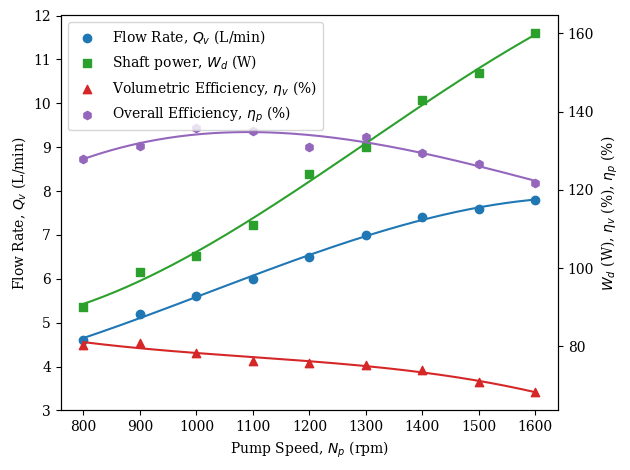

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif']

# Data
speed_rpm = np.array([1600, 1500, 1400, 1300, 1200, 1100, 1000,  900,  800], dtype=float)



# Measured flow rate (L/min)
flow_rate = np.array([7.8, 7.6, 7.4, 7.0, 6.5, 6.0, 5.6, 5.2, 4.6], dtype=float)


# Shaft power (W)
shaft_power = np.array([160, 150, 143, 131, 124, 111, 103,  99,  90], dtype=float)


# Overall efficiency (%)
overall_efficiency = np.array(
    [121.875, 126.666667, 129.3706294, 133.5877863, 131.0483871,
     135.1351351, 135.9223301, 131.3131313, 127.7777778],
    dtype=float
)

# Volumetric efficiency (%)
volumetric_efficiency = np.array(
    [68.18181818, 70.86247086, 73.92607393, 75.30930608,
     75.75757576, 76.28734901, 78.32167832, 80.80808081, 80.41958042],
    dtype=float
)


# Filename without extension
filename = 'all_vs_pump_speed'

# Data to x,y1,y2...
x=speed_rpm
y1=flow_rate
y2=shaft_power
y3=volumetric_efficiency
y4=overall_efficiency

# Plot labels also for legends
y1_label= 'Flow Rate, $Q_v$ (L/min)'
y2_label= 'Shaft power, $W_d$ (W)'
y3_label= 'Volumetric Efficiency, $\\eta_{v}$ (%)'
y4_label= 'Overall Efficiency, $\\eta_{p}$ (%)'

# axes labels
x_label= 'Pump Speed, $N_p$ (rpm)'
y_label='$W_d$ (W), $\\eta_{v}$ (%), $\\eta_{p}$ (%)'


# Curve fits (3rd degree polynomial)
coeffs1 = np.polyfit(x, y1, 3)
coeffs2 = np.polyfit(x, y2, 3)
coeffs3 = np.polyfit(x, y3, 3)
coeffs4 = np.polyfit(x, y4, 3)

poly_y1 = np.poly1d(coeffs1)
poly_y2 = np.poly1d(coeffs2)
poly_y3 = np.poly1d(coeffs3)
poly_y4 = np.poly1d(coeffs4)

# Fine x axis for smooth curves
x_fit = np.linspace(x.min(), x.max(), 200)

fig, ax1 = plt.subplots()

ax = ax1.twinx()

# Plot data points
ax1.scatter(x, y1, color='tab:blue', marker='o', label=y1_label)
ax.scatter(x, y2, color='tab:green', marker='s', label=y2_label)
ax.scatter(x, y3, color='tab:red', marker='^', label=y3_label)
ax.scatter(x, y4, color='tab:purple', marker='h', label=y4_label)


# Plot fitted curves
ax1.plot(x_fit, poly_y1(x_fit), color='tab:blue', linestyle='-')
ax.plot(x_fit, poly_y2(x_fit), color='tab:green', linestyle='-')
ax.plot(x_fit, poly_y3(x_fit), color='tab:red', linestyle='-')
ax.plot(x_fit, poly_y4(x_fit), color='tab:purple', linestyle='-')

# y limits
ax1.set_ylim(3, 12)

# Labels
ax1.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax1.set_ylabel('Flow Rate, $Q_v$ (L/min)')

lines = []
labels = []
for axi in [ax1, ax]:
    l, lbl = axi.get_legend_handles_labels()
    lines += l
    labels += lbl
ax.legend(lines, labels, loc='best')

# Legends
# ax.legend(loc='best')
# ax1.legend(loc='best')
# # Add Gridlines
# plt.grid(which='both', axis='both', linestyle='-', linewidth=0.5)

# plt.title('bsfc, lube, and exhaust vs brake power with Curve Fits')
plt.tight_layout()
plt.savefig(f'{filename}.png', dpi=600)
plt.show()
